In [1]:
import numpy as np

In [4]:
########################## k-NN 
from sklearn.neighbors import NearestNeighbors

In [13]:
#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X = np.array([[0, 0], [1, 0], [2, 0], [3, 0], [4, 0]])
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree')
nbrs.fit(X)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=3, p=2, radius=1.0)

In [16]:
distances, indices = nbrs.kneighbors([[1.2,0]])
print(distances)
print(indices)

[[ 0.2  0.8  1.2]]
[[1 2 0]]


In [18]:
########################## k-means
from sklearn.cluster import KMeans
X = np.array([[0, 0], [1, 0], [2, 0], [3, 0], [4, 0]])
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [19]:
kmeans.labels_

array([1, 1, 1, 0, 0], dtype=int32)

In [20]:
kmeans.cluster_centers_

array([[ 3.5,  0. ],
       [ 1. ,  0. ]])

In [35]:
kmeans_pred = kmeans.fit_predict(X)
kmeans_pred

array([1, 1, 1, 0, 0], dtype=int32)

In [36]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [37]:
kmeans.cluster_centers_

array([[ 3.5,  0. ],
       [ 1. ,  0. ]])

In [46]:
from sklearn.metrics.pairwise import pairwise_distances
pairwise_distances([X[3]], [kmeans.cluster_centers_[0]])

array([[ 0.5]])

In [1]:
########################## LOF another example
from sklearn.neighbors import LocalOutlierFactor

In [2]:
X = [[0], [1], [2], [3], [13], [-10]]

In [3]:
clf = LocalOutlierFactor(n_neighbors=2)

In [4]:
y_pred = clf.fit_predict(X)
y_pred

array([ 1,  1,  1,  1, -1, -1])

In [6]:
y_score = clf.predict_proba(X)
y_score

array([-1.        , -1.        , -0.66666667, -1.        , -4.        , -4.        ])

In [7]:
189         # Compute lof score over training samples to define threshold_:

-6.9999999996

In [8]:
########################## LOF another example
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [9]:
np.random.seed(42)

# Generate train data
X = 0.3 * np.random.randn(100, 2)
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X + 2, X - 2, X_outliers]

In [10]:
# fit the model
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(X)
y_pred_outliers = y_pred[200:]

hogehoge


In [11]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [7]:
# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

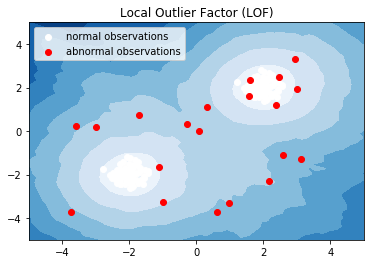

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X[:200, 0], X[:200, 1], c='white')
b = plt.scatter(X[200:, 0], X[200:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()